# IRIS DATA CLASSIFICATION     Lets Grow More 
 

# By - SRIKANTA MAHARA 

# Importing Important Libraries that we will need 

In [94]:
import numpy as np                    # import all the libraries tht are needed 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [95]:
irisdata=pd.read_csv('C:\\Users\\A\\Downloads\\IRIS.csv')

# Checking First 30 Rows 

In [96]:
irisdata.head(30)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [26]:
irisdata 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Checking The Number of Rows and Coloumns 

In [27]:
irisdata.shape

(150, 5)

In [97]:
irisdata.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [98]:
irisdata['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [30]:
irisdata.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Descritive Statistics of the Datset 

In [99]:
irisdata.describe() # getting statistical measures of the dataset 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
irisdata.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
Finding Out Co-realtion 

In [33]:
corr=irisdata.corr()
corr

C:\Users\A\AppData\Local\Temp\ipykernel_8828\1442010091.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=irisdata.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Different Types Of Charts 

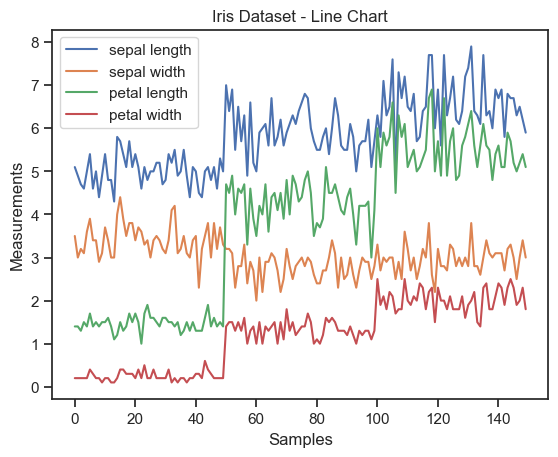

In [101]:
# Create a line chart
plt.plot(irisdata['sepal_length'], label='sepal length')
plt.plot(irisdata['sepal_width'], label='sepal width')
plt.plot(irisdata['petal_length'], label='petal length')
plt.plot(irisdata['petal_width'], label='petal width')

# Add labels and title
plt.xlabel('Samples')
plt.ylabel('Measurements')
plt.title('Iris Dataset - Line Chart')

# Add legend
plt.legend()

# Display the chart
plt.show()


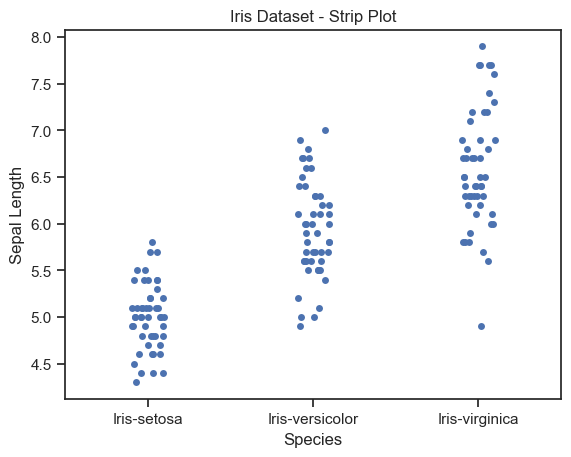

In [102]:
# Create a strip plot
sns.stripplot(x='species', y='sepal_length', data=irisdata)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Iris Dataset - Strip Plot')

# Display the plot
plt.show()


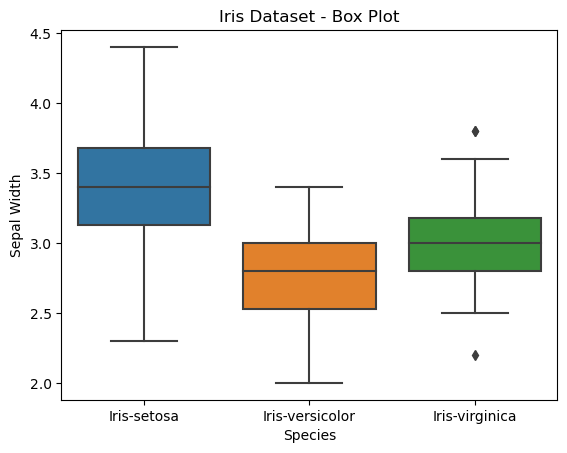

In [36]:
# Create a box plot
sns.boxplot(x='species', y='sepal_width', data=irisdata)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - Box Plot')

# Display the plot
plt.show()


# JOINT PLOT 

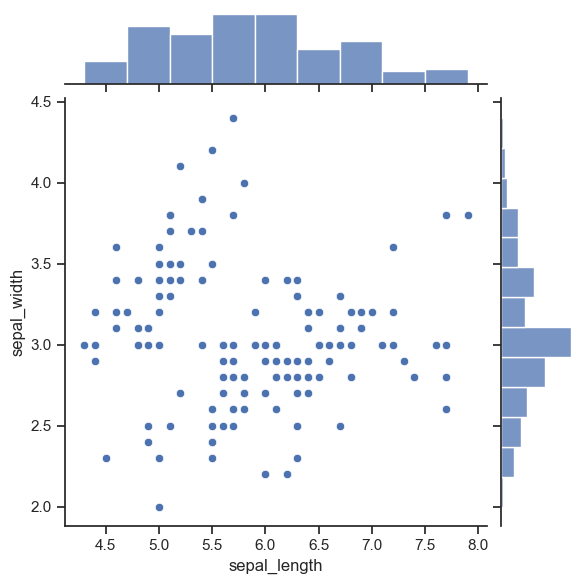

In [105]:
# Create a joint plot
sns.jointplot(data=irisdata, x="sepal_length", y="sepal_width")

# Display the plot
plt.show()


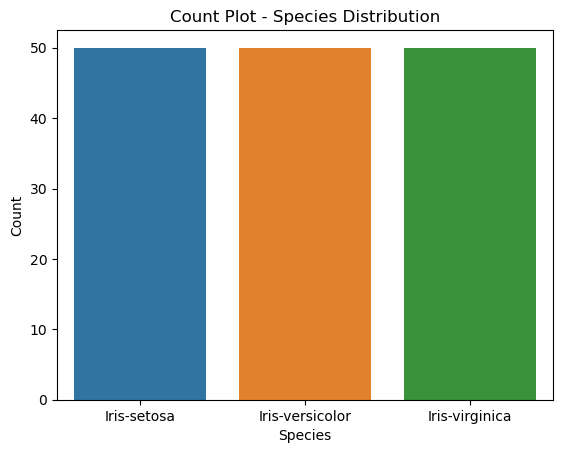

In [38]:
# Create a count plot
sns.countplot(data=irisdata, x="species")

# Set labels and title
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Count Plot - Species Distribution")

# Display the plot
plt.show()


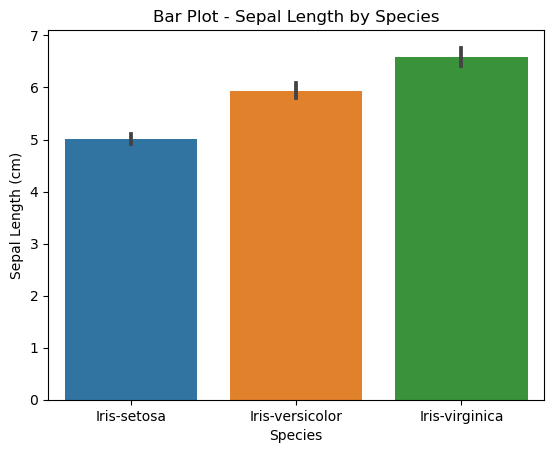

In [39]:
# Create a bar plot
sns.barplot(data=irisdata, x="species", y="sepal_length")

# Set labels and title
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.title("Bar Plot - Sepal Length by Species")

# Display the plot
plt.show()


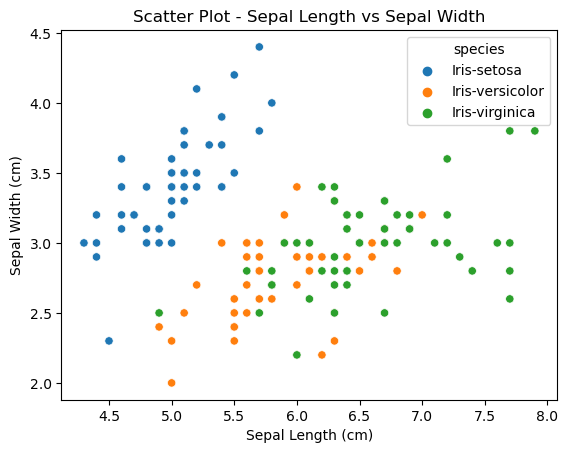

In [40]:
# Create a scatter plot
sns.scatterplot(data=irisdata, x="sepal_length", y="sepal_width", hue="species")

# Set labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Scatter Plot - Sepal Length vs Sepal Width")

# Display the plot
plt.show()


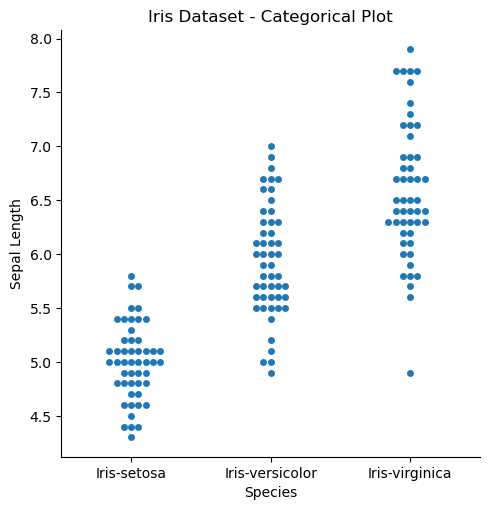

In [41]:
# Create a categorical plot
sns.catplot(x='species', y='sepal_length', data=irisdata, kind='swarm')

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Iris Dataset - Categorical Plot')

# Display the plot
plt.show()


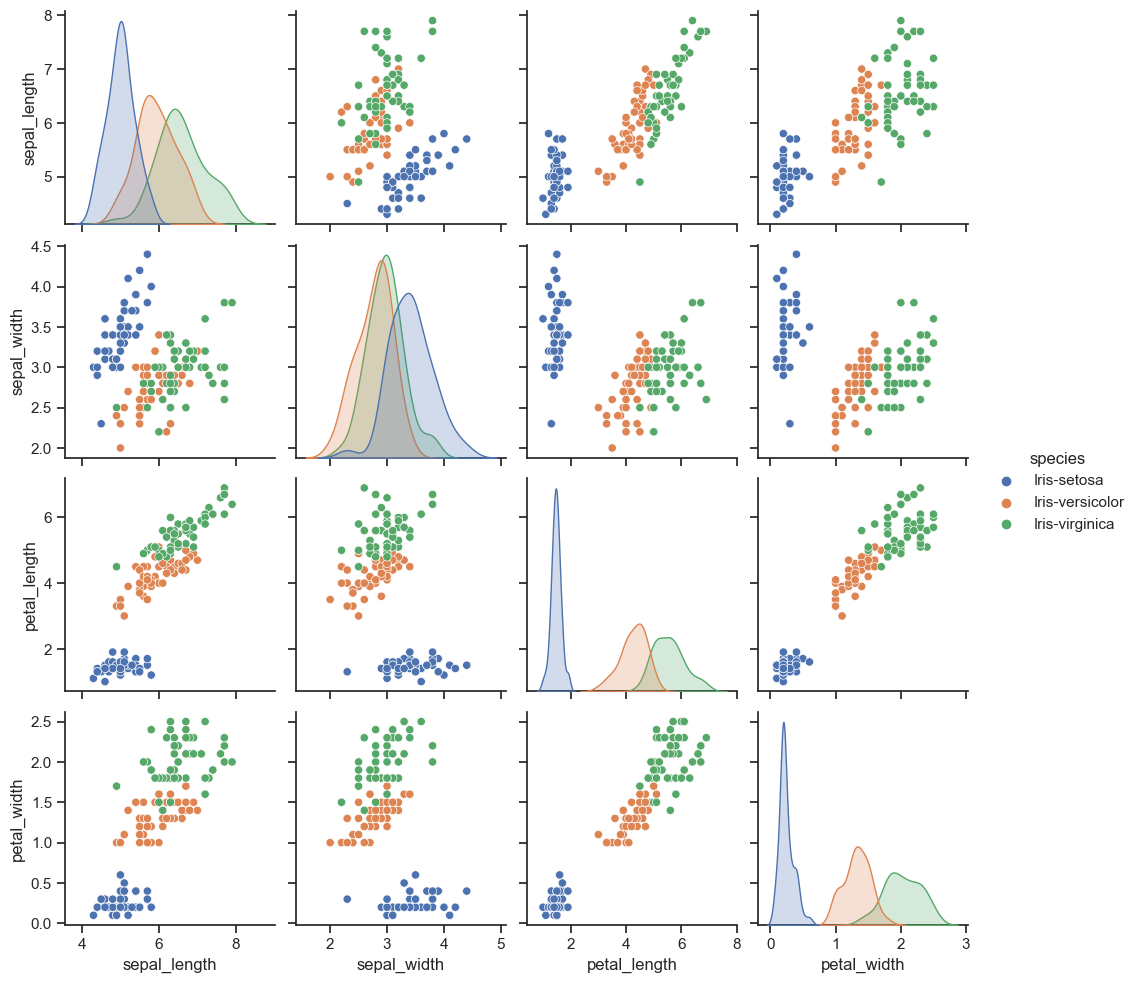

In [42]:
sns.set(style='ticks',color_codes = True )
g= sns.pairplot(irisdata,hue = 'species')
plt.show()

Text(0.5, 1.0, 'Heat Map ')

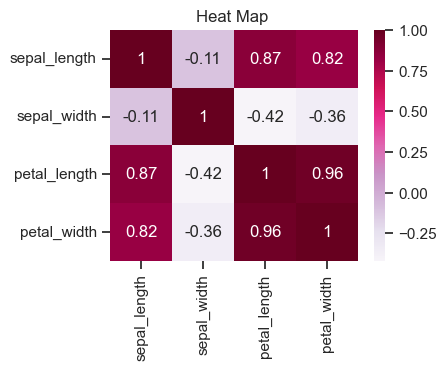

In [49]:
plt.figure(figsize=(4,3))
sns.heatmap(corr,annot = True,cmap = 'PuRd')
plt.title("Heat Map ")

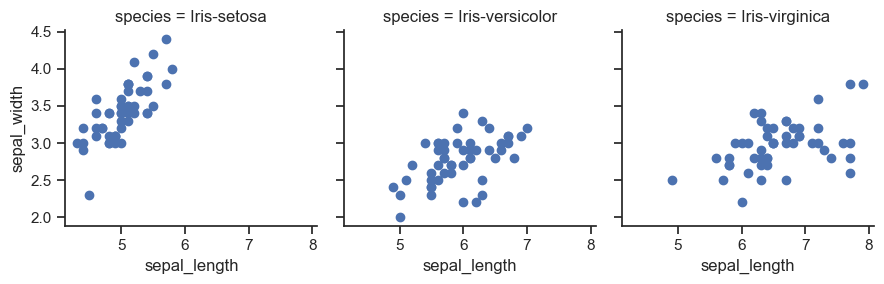

In [55]:
c= sns.FacetGrid(irisdata,col ='species')
c.map(plt.scatter,'sepal_length','sepal_width')

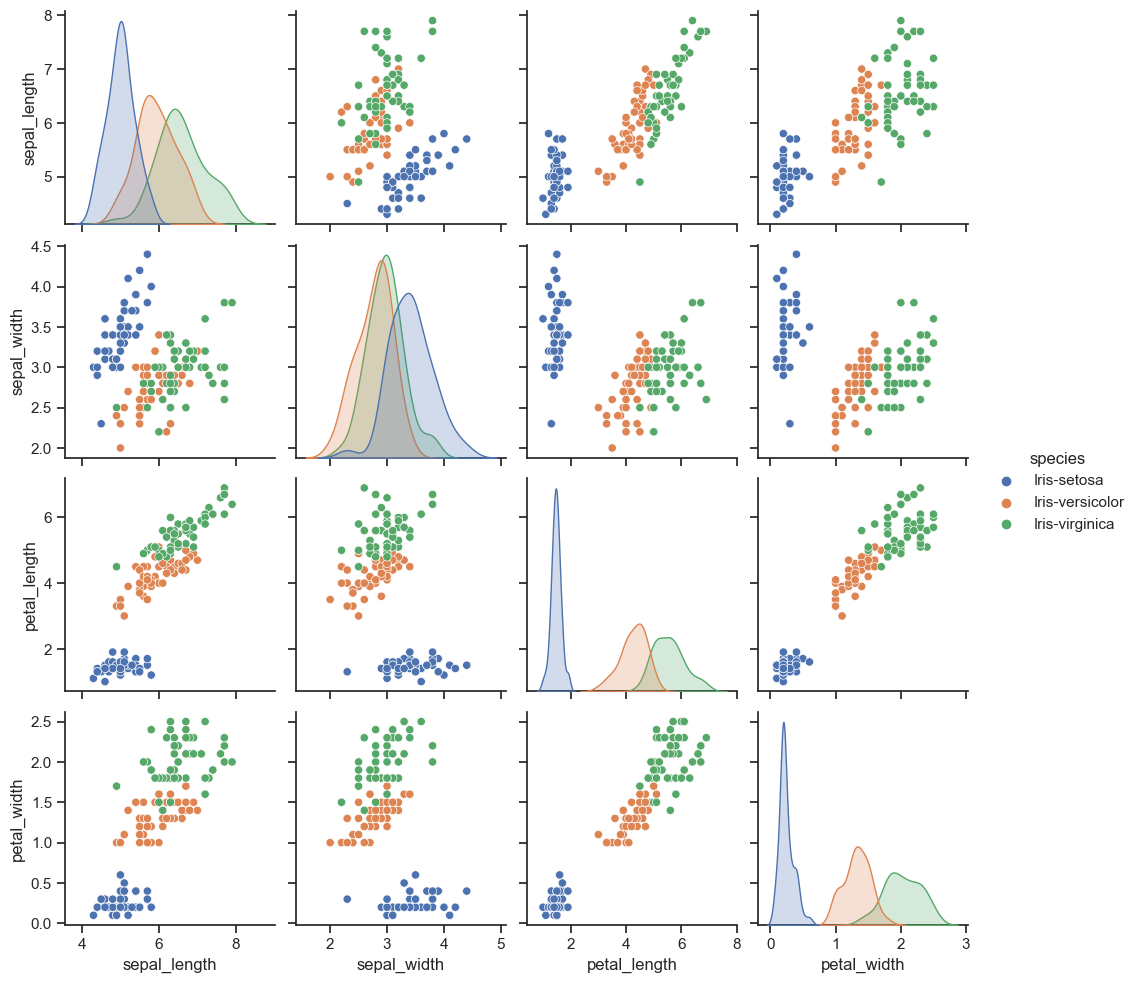

In [46]:
# Create a pair plot
sns.pairplot(irisdata, hue='species')

# Display the plot
plt.show()


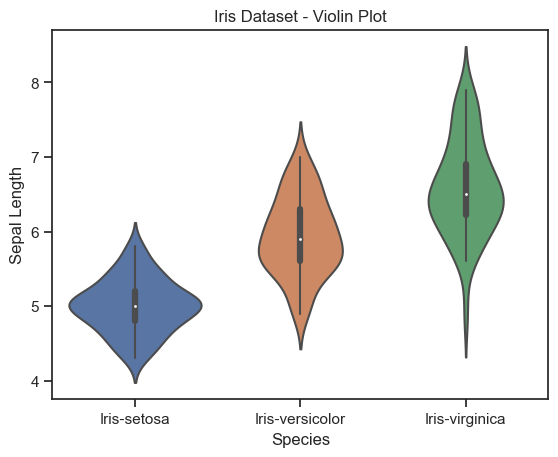

In [56]:
# Create a violin plot
sns.violinplot(x='species', y='sepal_length', data=irisdata)

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Iris Dataset - Violin Plot')

# Display the plot
plt.show()


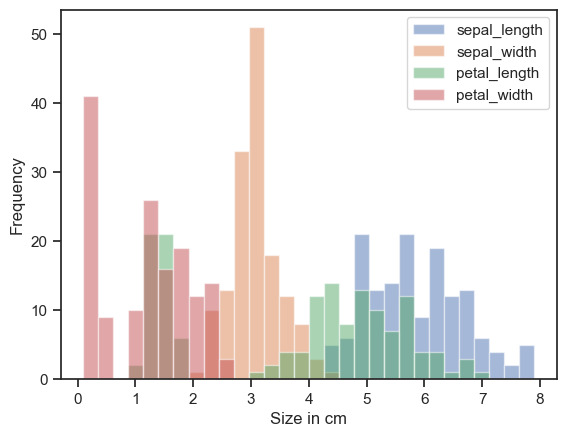

In [106]:
axis = irisdata.plot.hist(bins = 30,alpha = 0.5)
axis.set_xlabel('Size in cm') ;

C:\Users\A\AppData\Local\Temp\ipykernel_8828\4061260115.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=irisdata['petal_width'],bins =40,color ='b')


Text(0.5, 1.0, 'Petal Width Distribution Plot ')

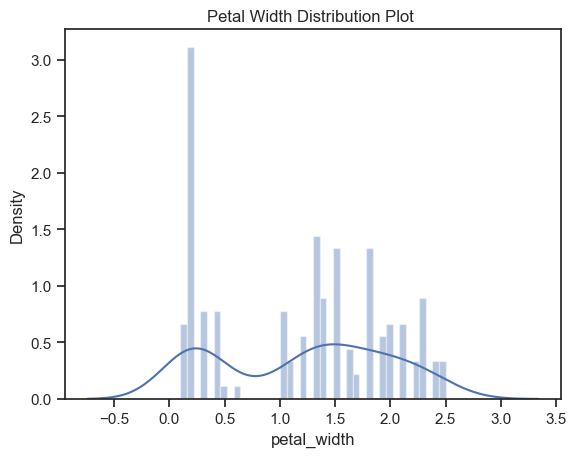

In [108]:
sns.distplot(a=irisdata['petal_width'],bins =40,color ='b')
plt.title('Petal Width Distribution Plot ')

# - Sepal length highest freq lies between 5.5 cm to 6 cm which is 30-35 cm
# - Petal length highest freq lies between 1 cm to 2 cm which is 50 cm
# - Sepal width highest freq lies between 3 cm to 3.5 cm which is 70 cm
# - Petal width highest freq lies between 0 cm to 0.5 cm which is 40-45 cm